In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
early_warning_url = "data_exp_4.csv"
early_warning = pd.read_csv(early_warning_url, sep=";")
early_warning

,Unnamed: 0,maior_pacote,total_ips_destino,total_ips_origem,10_kurt_maior_pacote,10_skw_total_ips_destino,10_coefficient_variation_total_ips_origem,has_bot
0,0,238,23690,28,NaN,NaN,NaN,0
1,1,90,37770,27,NaN,NaN,NaN,0
2,2,90,38095,36,NaN,NaN,NaN,0
3,3,110,37916,33,NaN,NaN,NaN,0
4,4,90,37764,32,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
1435,1435,182,37923,20,1.460108,0.306242,0.227431,1
1436,1436,90,37922,18,1.659422,0.307236,0.227648,1
1437,1437,90,38084,14,1.659422,0.286802,0.227326,1
1438,1438,90,37919,15,1.679291,0.291786,0.226356,1


In [3]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation

class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)
        
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

In [4]:
colunas = ['10_kurt_maior_pacote', '10_skw_total_ips_destino', '10_coefficient_variation_total_ips_origem' ]
init = 241
limit = 321
x_train = early_warning[colunas].copy()[init:limit]
y_real = early_warning['has_bot'][init:limit]
#x_train = x_train.fillna(0)
clustering = KMeans(n_clusters=2, random_state=0).fit(x_train)    
y_test = clustering.labels_
print(confusion_matrix(y_real, y_test))
print(classification_report(y_real, y_test, digits=4))

[[60  0]
 [ 0 20]]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        60
           1     1.0000    1.0000    1.0000        20

    accuracy                         1.0000        80
   macro avg     1.0000    1.0000    1.0000        80
weighted avg     1.0000    1.0000    1.0000        80



/home/anderson/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 432x288 with 0 Axes>

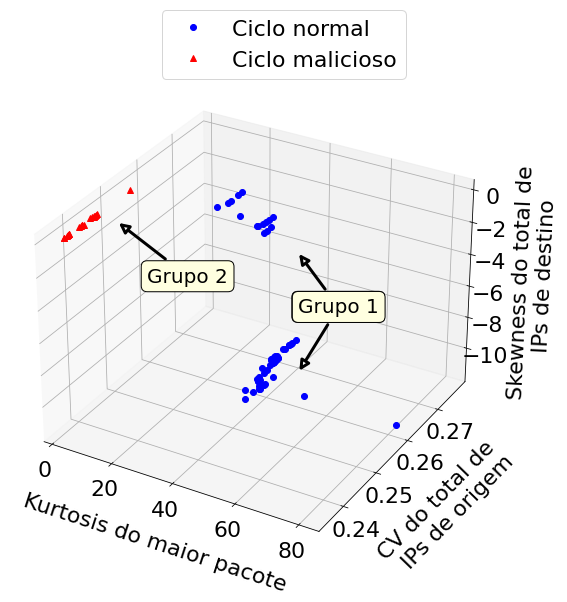

<Figure size 432x288 with 0 Axes>

In [5]:
colunas = ['10_kurt_maior_pacote', '10_skw_total_ips_destino', '10_coefficient_variation_total_ips_origem',
           'has_bot']
          
dataframe = early_warning[colunas][init:limit]
dataframe['y_test'] = y_test
df1= dataframe.query('has_bot == 0')                                
df2= dataframe.query('has_bot == 1')  

plt.clf()

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")
font_size = 22


ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]

font_size_group = 20
ax2.annotate3D('Grupo 1',  (36.3, 0.273, -5.4),
              xytext=(0, -60),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.annotate3D('Grupo 1', (40, 0.27, -12.5),
              xytext=(0, 60),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))


ax2.annotate3D('Grupo 2', (38, 0.222, 5.3),
              xytext=(30, -60),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))


ax2.set_xlabel('\n\nKurtosis do maior pacote', fontsize=font_size) 
ax2.set_ylabel('\n\n\nCV do total de \n IPs de origem', fontsize=font_size) 
ax2.set_zlabel('\n\nSkewness do total de \n IPs de destino', fontsize=font_size)

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')

fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("original.pdf")
plt.show()
plt.clf()


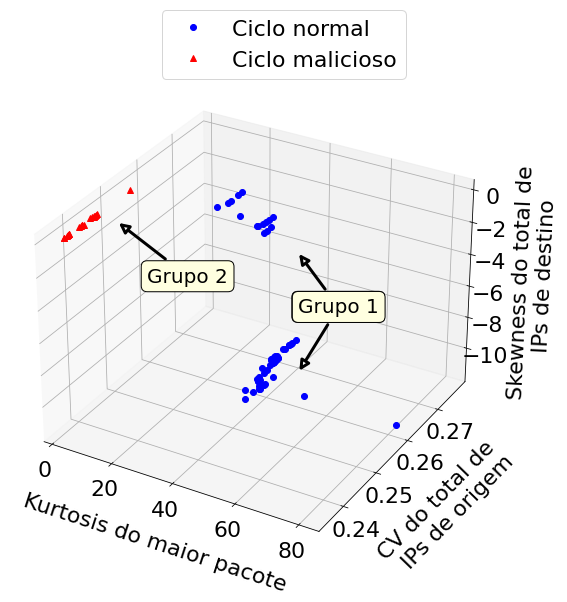

In [6]:
df1= dataframe.query('y_test == 0')                                
df2= dataframe.query('y_test == 1')  

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")

ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]

ax2.set_xlabel('\n\nKurtosis do maior pacote', fontsize=font_size) 
ax2.set_ylabel('\n\n\nCV do total de \n IPs de origem', fontsize=font_size) 
ax2.set_zlabel('\n\nSkewness do total de \n IPs de destino', fontsize=font_size)

font_size_group = 20
ax2.annotate3D('Grupo 1',  (36.3, 0.273, -5.4),
              xytext=(0, -60),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.annotate3D('Grupo 1', (40, 0.27, -12.5),
              xytext=(0, 60),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))


ax2.annotate3D('Grupo 2', (38, 0.222, 5.3),
              xytext=(30, -60),
              fontsize = font_size_group,
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')

fig2.legend(loc="upper center",prop={'size': font_size})

plt.savefig("cluster.pdf")
plt.show()

<Figure size 432x288 with 0 Axes>

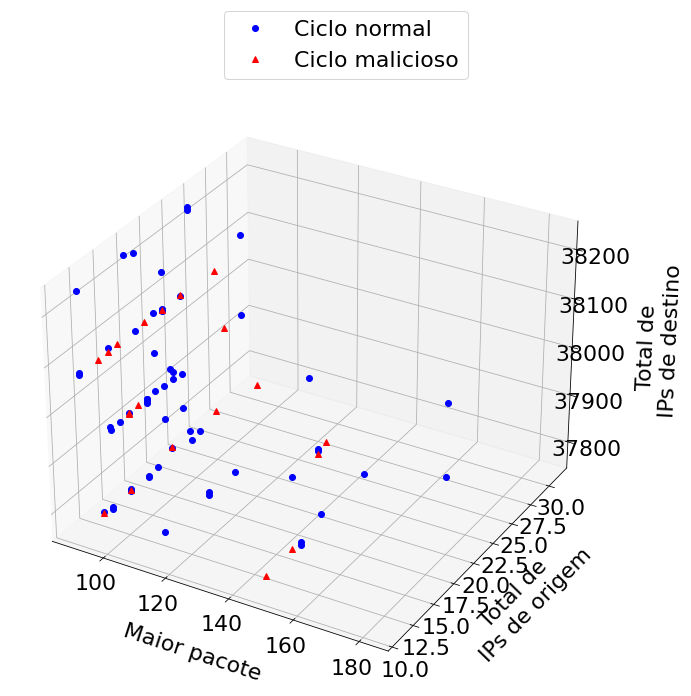

<Figure size 432x288 with 0 Axes>

In [7]:
colunas = ['maior_pacote', 'total_ips_destino', 'total_ips_origem',
           'has_bot']
          
dataframe = early_warning[colunas][init:limit]
dataframe['y_test'] = y_test
df1= dataframe.query('has_bot == 0')                                
df2= dataframe.query('has_bot == 1')  

plt.clf()

fig2 = plt.figure(figsize = (11,11))
ax2 = plt.axes(projection ="3d")
font_size = 22
ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]


ax2.set_xlabel('\n\nMaior pacote', fontsize=font_size) 
ax2.set_ylabel('\n\nTotal de \n IPs de origem', fontsize=font_size) 
ax2.set_zlabel('\n\n\n\nTotal de \n IPs de destino', fontsize=font_size)
               
font_size_group = 20

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')
fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("sem_esap.pdf")
plt.show()
plt.clf()